In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# for creating gif-images
import imageio
import os.path

# Read data files

In [2]:
# olympic games data
olympics = pd.read_csv('../olympics/olympics_upd.csv')
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284851 entries, 0 to 284850
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   name        284851 non-null  object 
 1   sex         284851 non-null  object 
 2   age         275536 non-null  float64
 3   team        284851 non-null  object 
 4   noc         284851 non-null  object 
 5   games       284851 non-null  object 
 6   year        284851 non-null  int64  
 7   season      284851 non-null  object 
 8   city        284851 non-null  object 
 9   sport       284851 non-null  object 
 10  event       284851 non-null  object 
 11  medal       42220 non-null   object 
 12  birth_year  275536 non-null  float64
 13  country     284828 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 30.4+ MB


In [3]:
# setting sort order for 'medal' field (by making 'medal' a Categorical field)
medals_order = ['Bronze', 'Silver', 'Gold']
olympics['medal'] = pd.Categorical(olympics['medal'], medals_order)

# rename column
olympics.rename(columns={'sex': 'gender'}, inplace=True)

In [4]:
# olympic games data
countries = pd.read_csv('../olympics/countries_upd.csv')
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   continent  246 non-null    object 
 1   region     246 non-null    object 
 2   country    246 non-null    object 
 3   capital    233 non-null    object 
 4   fips       236 non-null    object 
 5   iso_2      238 non-null    object 
 6   iso_3      239 non-null    object 
 7   iso_no     239 non-null    float64
 8   internet   237 non-null    object 
 9   note       15 non-null     float64
dtypes: float64(2), object(8)
memory usage: 19.3+ KB


In [5]:
# Adding DECADES to Olympics data
olympics['decade'] = (olympics['year'] // 10) * 10
olympics.sample(5)

,name,gender,age,team,noc,games,year,season,city,sport,event,medal,birth_year,country,decade
29235,Ismael Carbonell Sam,M,33.0,Cuba,CUB,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,NaN,1959.0,Cuba,1990
121160,Pauline Manser,F,31.0,Australia-2,AUS,2000 Summer,2000,Summer,Sydney,Beach Volleyball,Beach Volleyball Women's Beach Volleyball,NaN,1969.0,Australia,2000
70546,Jess Gruber Huncal,M,24.0,Venezuela,VEN,1960 Summer,1960,Summer,Roma,Fencing,"Fencing Men's Foil, Team",NaN,1936.0,Venezuela,1960
153785,"Chester Wilson ""Chet"" Phillips",M,22.0,United States,USA,1936 Summer,1936,Summer,Berlin,Gymnastics,Gymnastics Men's Individual All-Around,NaN,1914.0,USA,1930
118016,Arthur St. Clair Lyon,M,47.0,United States,USA,1924 Summer,1924,Summer,Paris,Fencing,"Fencing Men's epee, Team",NaN,1877.0,USA,1920


# Part 1 - Age of sportsmen ever

In [6]:
# getting age data as separate dataframe
age_ever = olympics[['name', 'gender', 'age', 'year', 'decade']]

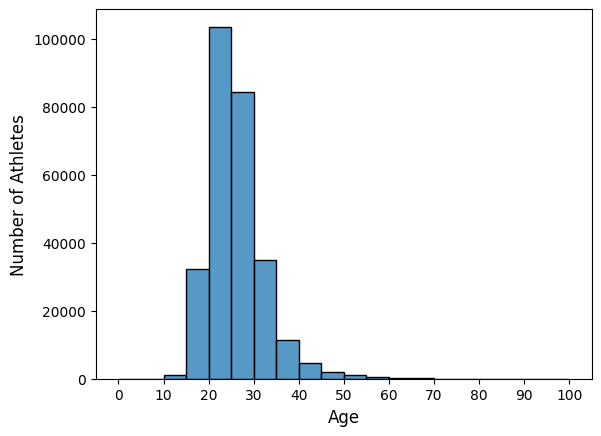

In [62]:
# data distribution (using seaborn histplot): 
# age ever
sns.histplot(data=age_ever, x="age", binrange = [0, 100], binwidth=5);

plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Athletes', fontsize=12)
plt.xticks(np.linspace(start=0, stop=100, num=11)) #, rotation=45)

plt.savefig("age_ever_distribution_histplot.png")
plt.show()

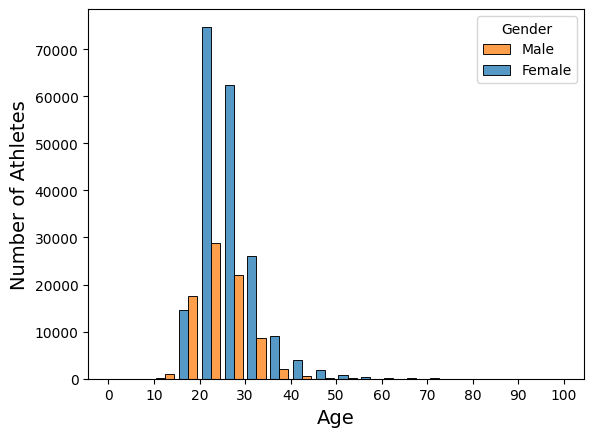

In [64]:
# data distribution (using seaborn histplot):
# age per gender
sns.histplot(data=age_ever, x="age", hue='gender', 
             binrange = [0, 100], binwidth=5, 
             multiple="dodge", shrink=.8);

plt.legend(title='Gender', labels=['Male', 'Female']) #, fontsize=10)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Athletes', fontsize=14)
plt.xticks(np.linspace(start=0, stop=100, num=11)) #, rotation=45)

plt.savefig("age_ever_by_gender_distribution_histplot.png")
plt.show()

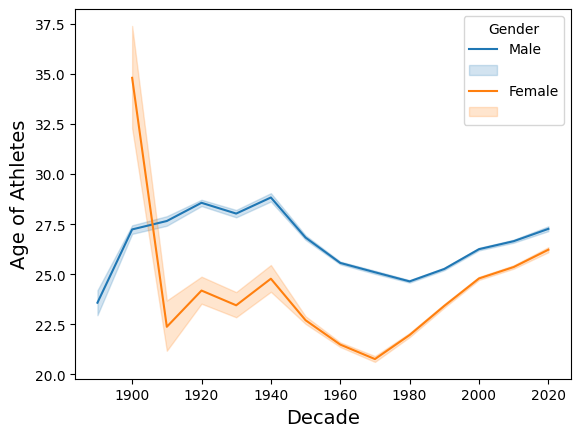

In [73]:
# age data per gender by decade (using seaborn lineplot):
# male
#sns.lineplot(data=age_ever, x="decade", y="age", hue="decade");
sns.lineplot(data=age_ever, x="decade", y="age", hue="gender");

plt.legend(title='Gender', labels=['Male', '', 'Female', '']) #, fontsize=10)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Age of Athletes', fontsize=14)
#plt.xticks(np.linspace(start=0, stop=100, num=11)) #, rotation=45)

plt.savefig("age_per_gender_over_decades_lineplot.png")
plt.show()

# Part 2 - Age of sportsmen with medals

In [10]:
# getting age data as separate dataframe
medals_mask = ~(olympics['medal'].isnull())

medals_age = olympics[medals_mask][['name', 'gender', 'age', 'year', 'decade', 'medal']]
medals_age

,name,gender,age,year,decade,medal
3,Edgar Lindenau Aabye,M,34.0,1900,1900,Gold
12,Arvo Ossian Aaltonen,M,30.0,1920,1920,Bronze
13,Arvo Ossian Aaltonen,M,30.0,1920,1920,Bronze
15,Paavo Johannes Aaltonen,M,28.0,1948,1940,Bronze
16,Paavo Johannes Aaltonen,M,28.0,1948,1940,Gold
...,...,...,...,...,...,...
284692,Sergey Mikhaylovich Zubov,M,21.0,1992,1990,Gold
284736,Matja Zupan,M,19.0,1988,1980,Silver
284768,Pirmin Zurbriggen,M,25.0,1988,1980,Gold
284770,Pirmin Zurbriggen,M,25.0,1988,1980,Bronze


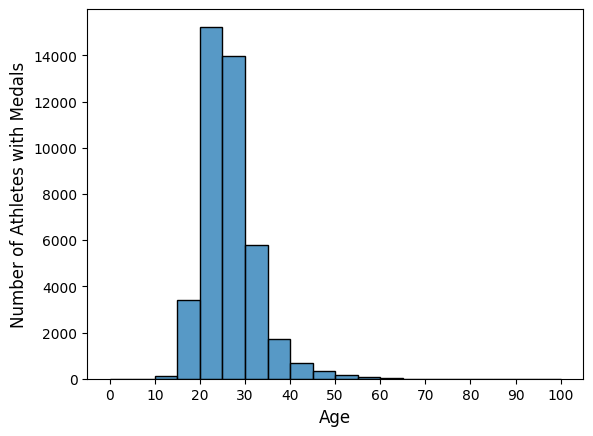

In [68]:
# data distribution (using seaborn histplot): 
# medals age ever
sns.histplot(data=medals_age, x="age", binrange = [0, 100], binwidth=5);

plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Athletes with Medals', fontsize=12)
plt.xticks(np.linspace(start=0, stop=100, num=11)) #, rotation=45)

plt.savefig("medals_age_distribution_histplot.png")
plt.show()

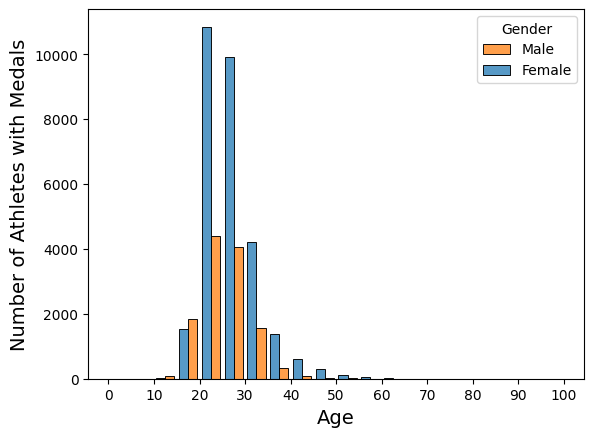

In [70]:
# data distribution (using seaborn histplot):
# age per gender
sns.histplot(data=medals_age, x="age", hue='gender', 
             binrange = [0, 100], binwidth=5, 
             multiple="dodge", shrink=.8);

plt.legend(title='Gender', labels=['Male', 'Female']) #, fontsize=10)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Athletes with Medals', fontsize=14)
plt.xticks(np.linspace(start=0, stop=100, num=11)) #, rotation=45)

plt.savefig("medals_age_ever_by_gender_distribution_histplot.png")
plt.show()

In [48]:
my_lst = [x for x in range(0,100,5)]
len(my_lst), my_lst

(20,
 [0,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95])

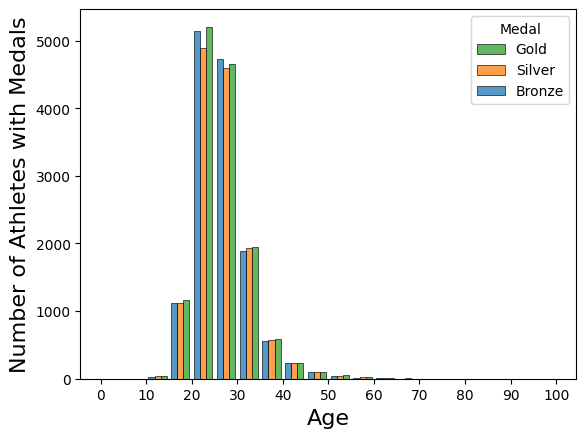

In [76]:
# data distribution (using seaborn histplot):
# age per gender
sns.histplot(data=medals_age, x='age', hue='medal', 
             binrange = [0, 100], binwidth=5,
             multiple='dodge', shrink=.8);

plt.legend(title='Medal', labels=['Gold', 'Silver','Bronze']) #, fontsize=10)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Number of Athletes with Medals', fontsize=16)
plt.xticks(np.linspace(start=0, stop=100, num=11)) #, rotation=45)

plt.savefig('medals_age_ever_by_medaltype_distribution_histplot.png')
plt.show()

In [14]:
gold_female_mask = (medals_age['medal']=='Gold')&(medals_age['gender']=='F')
df_gold_female = medals_age[gold_female_mask]
df_gold_female

,name,gender,age,year,decade,medal
33,Ragnhild Margrethe Aamodt,F,27.0,2008,2000,Gold
214,Margaret Ives Abbott (-Dunne),F,23.0,1900,1900,Gold
1275,Nicola Virginia Adams,F,29.0,2012,2010,Gold
1276,Nicola Virginia Adams,F,33.0,2016,2010,Gold
1307,Valerie Kasanita Adams-Vili (-Price),F,23.0,2008,2000,Gold
...,...,...,...,...,...,...
284277,Zhang Hui,F,21.0,2010,2010,Gold
284389,Zhou Yang,F,18.0,2010,2010,Gold
284390,Zhou Yang,F,18.0,2010,2010,Gold
284391,Zhou Yang,F,22.0,2014,2010,Gold


In [15]:
df_gold_female.describe()

,age,year,decade
count,4145.000000,4148.000000,4148.000000
mean,24.598552,1994.707811,1990.930569
std,5.274511,22.162616,22.744044
min,13.000000,1900.000000,1900.000000
25%,21.000000,1984.000000,1980.000000
50%,24.000000,2000.000000,2000.000000
75%,28.000000,2012.000000,2010.000000
max,63.000000,2020.000000,2020.000000


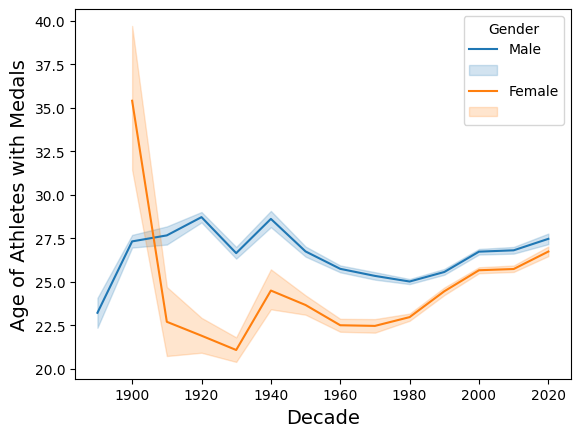

In [77]:
# medal age over decades (using seaborn lineplot):
# per gender
sns.lineplot(data=medals_age, x="decade", y='age', hue='gender',
            );

plt.legend(title='Gender', labels=['Male', '', 'Female', '']) #, fontsize=10)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Age of Athletes with Medals', fontsize=14)
#plt.xticks(np.linspace(start=0, stop=100, num=11)) #, rotation=45)

plt.savefig("medals_age_by_gender_over_decades_lineplot.png")
plt.show()

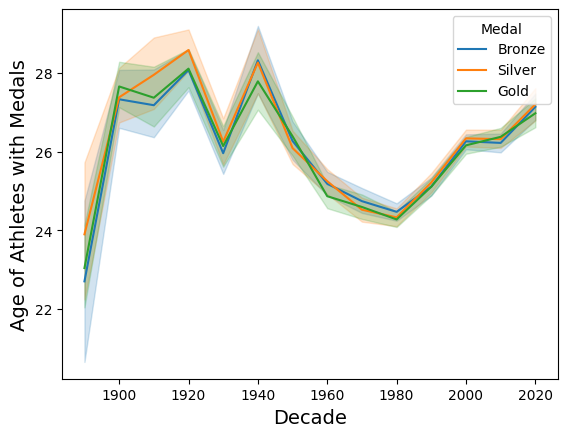

In [75]:
# medal age over decades (using seaborn lineplot):
# per medal type
sns.lineplot(data=medals_age, x="decade", y='age', hue='medal',
            );

plt.legend(title='Medal') #, fontsize=10)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Age of Athletes with Medals', fontsize=14)
#plt.xticks(np.linspace(start=0, stop=100, num=11)) #, rotation=45)

plt.savefig("medals_age_by_medaltype_over_decades_lineplot.png")
plt.show()

In [18]:
silver_female_mask = (medals_age['medal']=='Silver')&(medals_age['gender']=='F')
df_silver_female = medals_age[silver_female_mask]
df_silver_female.describe()

,age,year,decade
count,4114.000000,4120.000000,4120.000000
mean,24.681575,1994.708738,1990.910194
std,5.312113,22.031706,22.604653
min,11.000000,1900.000000,1900.000000
25%,21.000000,1984.000000,1980.000000
50%,24.000000,2000.000000,2000.000000
75%,28.000000,2012.000000,2010.000000
max,55.000000,2020.000000,2020.000000


In [19]:
bronze_female_mask = (medals_age['medal']=='Bronze')&(medals_age['gender']=='F')
df_bronze_female = medals_age[bronze_female_mask]
df_bronze_female.describe()

,age,year,decade
count,4185.000000,4193.000000,4193.000000
mean,24.894385,1995.272120,1991.488195
std,5.292391,21.876881,22.494240
min,12.000000,1900.000000,1900.000000
25%,21.000000,1984.000000,1980.000000
50%,25.000000,2000.000000,2000.000000
75%,28.000000,2012.000000,2010.000000
max,69.000000,2020.000000,2020.000000


# Part 3 - Top Performers

In [20]:
# TEMP data set

# sportsmen with the maximum number of medals
top_perf_all_medals_mask = ~(olympics['medal'].isnull())
top_perf_all_medals = olympics[top_perf_all_medals_mask].groupby(by=['name', 'birth_year']).describe() #[['medal']].count()
#top_perf_all_medals.reset_index(drop=False, inplace=True)
#top_perf_all_medals.sort_values(by='medal', ascending=False, inplace=True)
#top_perf_all_medals.head(50)

In [21]:
top_perf_all_medals

age                               \
                                        count  mean  std   min   25%   50%   
name                         birth_year                                      
A. Joshua "Josh" West        1977.0       1.0  31.0  NaN  31.0  31.0  31.0   
ABALO Luc                    1984.0       1.0  36.0  NaN  36.0  36.0  36.0   
ABBOTT Monica                1984.0       1.0  36.0  NaN  36.0  36.0  36.0   
ABDELAZIZ Feryal             1998.0       1.0  22.0  NaN  22.0  22.0  22.0   
ABDI Bashir                  1988.0       1.0  32.0  NaN  32.0  32.0  32.0   
...                                       ...   ...  ...   ...   ...   ...   
van der WESTHUYZEN Jean      1998.0       1.0  22.0  NaN  22.0  22.0  22.0   
ver Maximiliano David Banega 1988.0       1.0  20.0  NaN  20.0  20.0  20.0   
von BREDOW-WERNDL Jessica    1985.0       2.0  35.0  0.0  35.0  35.0  35.0   
von ECKERMANN Henrik         1980.0       1.0  40.0  NaN  40.0  40.0  40.0   
ystein Pettersen             1983.0       1.0  27.0  NaN  27.0  27.0  27.0   

                                                     year          ...  \
                                          75%   max count    mean  ...   
name                         birth_year                            ...   
A. Joshua "Josh" West        1977.0      31.0  31.0   1.0  2008.0  ...   
ABALO Luc                    1984.0      36.0  36.0   1.0  2020.0  ...   
ABBOTT Monica                1984.0      36.0  36.0   1.0  2020.0  ...   
ABDELAZIZ Feryal             1998.0      22.0  22.0   1.0  2020.0  ...   
ABDI Bashir                  1988.0      32.0  32.0   1.0  2020.0  ...   
...                                       ...   ...   ...     ...  ...   
van der WESTHUYZEN Jean      1998.0      22.0  22.0   1.0  2020.0  ...   
ver Maximiliano David Banega 1988.0      20.0  20.0   1.0  2008.0  ...   
von BREDOW-WERNDL Jessica    1985.0      35.0  35.0   2.0  2020.0  ...   
von ECKERMANN Henrik         1980.0      40.0  40.0   1.0  2020.0  ...   
ystein Pettersen             1983.0      27.0  27.0   1.0  2010.0  ...   

                                                        decade               \
                                            75%     max  count    mean  std   
name                         birth_year                                       
A. Joshua "Josh" West        1977.0      2008.0  2008.0    1.0  2000.0  NaN   
ABALO Luc                    1984.0      2020.0  2020.0    1.0  2020.0  NaN   
ABBOTT Monica                1984.0      2020.0  2020.0    1.0  2020.0  NaN   
ABDELAZIZ Feryal             1998.0      2020.0  2020.0    1.0  2020.0  NaN   
ABDI Bashir                  1988.0      2020.0  2020.0    1.0  2020.0  NaN   
...                                         ...     ...    ...     ...  ...   
van der WESTHUYZEN Jean      1998.0      2020.0  2020.0    1.0  2020.0  NaN   
ver Maximiliano David Banega 1988.0      2008.0  2008.0    1.0  2000.0  NaN   
von BREDOW-WERNDL Jessica    1985.0      2020.0  2020.0    2.0  2020.0  0.0   
von ECKERMANN Henrik         1980.0      2020.0  2020.0    1.0  2020.0  NaN   
ystein Pettersen             1983.0      2010.0  2010.0    1.0  2010.0  NaN   

                                                                         \
                                            min     25%     50%     75%   
name                         birth_year                                   
A. Joshua "Josh" West        1977.0      2000.0  2000.0  2000.0  2000.0   
ABALO Luc                    1984.0      2020.0  2020.0  2020.0  2020.0   
ABBOTT Monica                1984.0      2020.0  2020.0  2020.0  2020.0   
ABDELAZIZ Feryal             1998.0      2020.0  2020.0  2020.0  2020.0   
ABDI Bashir                  1988.0      2020.0  2020.0  2020.0  2020.0   
...                                         ...     ...     ...     ...   
van der WESTHUYZEN Jean      1998.0      2020.0  2020.0  2020.0  2020.0   
ver Maximiliano David Banega 1988.0      2000.0  2000.0

In [22]:
# save 'describe' results as csv-file
top_perf_all_medals.to_csv(path_or_buf='../olympics/top_perf_all_medals_describe.csv', index=False,
                sep=',', na_rep='', header=True, mode='w', encoding='utf-8', decimal='.')

### Top performers ever (all medals)

In [23]:
# sportsmen with the maximum number of medals
top_perf_all_medals_mask = ~(olympics['medal'].isnull())
top_perf_all_medals = olympics[top_perf_all_medals_mask].groupby(by=['name', 'birth_year','gender', 'country', 'season', 'sport'])[['medal']].count()
top_perf_all_medals.sort_values(by='medal', ascending=False, inplace=True)
top_perf_all_medals.reset_index(drop=False, inplace=True)
top_perf_all_medals.head(30)

,name,birth_year,gender,country,season,sport,medal
0,"Michael Fred Phelps, II",1985.0,M,USA,Summer,Swimming,28
1,Larysa Semenivna Latynina (Diriy-),1935.0,F,Russia,Summer,Gymnastics,18
2,Nikolay Yefimovich Andrianov,1953.0,M,Russia,Summer,Gymnastics,15
3,Ole Einar Bjrndalen,1974.0,M,Norway,Winter,Biathlon,13
4,Edoardo Mangiarotti,1919.0,M,Italy,Summer,Fencing,13
5,Borys Anfiyanovych Shakhlin,1932.0,M,Russia,Summer,Gymnastics,13
6,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",1973.0,F,USA,Summer,Swimming,12
7,Aleksey Yuryevich Nemov,1976.0,M,Russia,Summer,Gymnastics,12
8,Paavo Johannes Nurmi,1898.0,M,Finland,Summer,Athletics,12
9,Natalie Anne Coughlin (-Hall),1983.0,F,USA,Summer,Swimming,12


In [24]:
# top performers (all medals): Male
top_perf_all_medals[top_perf_all_medals['gender']=='M'].head(20)

,name,birth_year,gender,country,season,sport,medal
0,"Michael Fred Phelps, II",1985.0,M,USA,Summer,Swimming,28
2,Nikolay Yefimovich Andrianov,1953.0,M,Russia,Summer,Gymnastics,15
3,Ole Einar Bjrndalen,1974.0,M,Norway,Winter,Biathlon,13
4,Edoardo Mangiarotti,1919.0,M,Italy,Summer,Fencing,13
5,Borys Anfiyanovych Shakhlin,1932.0,M,Russia,Summer,Gymnastics,13
7,Aleksey Yuryevich Nemov,1976.0,M,Russia,Summer,Gymnastics,12
8,Paavo Johannes Nurmi,1898.0,M,Finland,Summer,Athletics,12
12,Takashi Ono,1931.0,M,Japan,Summer,Gymnastics,12
13,Mark Andrew Spitz,1950.0,M,USA,Summer,Swimming,11
14,"Matthew Nicholas ""Matt"" Biondi",1966.0,M,USA,Summer,Swimming,11


In [25]:
# top performers (all medals): Female
top_perf_all_medals[top_perf_all_medals['gender']=='F'].head(10)

,name,birth_year,gender,country,season,sport,medal
1,Larysa Semenivna Latynina (Diriy-),1935.0,F,Russia,Summer,Gymnastics,18
6,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",1973.0,F,USA,Summer,Swimming,12
9,Natalie Anne Coughlin (-Hall),1983.0,F,USA,Summer,Swimming,12
10,"Dara Grace Torres (-Hoffman, -Minas)",1967.0,F,USA,Summer,Swimming,12
11,Birgit Fischer-Schmidt,1962.0,F,Germany,Summer,Canoeing,12
15,Vra slavsk (-Odloilov),1942.0,F,Czech Republic,Summer,Gymnastics,11
17,Stefania Belmondo,1969.0,F,Italy,Winter,Cross Country Skiing,10
20,Franziska van Almsick,1978.0,F,Germany,Summer,Swimming,10
23,Marit Bjrgen,1981.0,F,Norway,Winter,Cross Country Skiing,10
24,Raisa Petrovna Smetanina,1953.0,F,Russia,Winter,Cross Country Skiing,10


### Top performers ever (Gold medals)

In [26]:
# sportsmen with the maximum number of gold medals
top_perf_gold_mask = olympics['medal']=='Gold'
top_perf_gold = olympics[top_perf_gold_mask].groupby(by=['name', 'birth_year', 'gender', 'country', 'season', 'sport'])[['medal']].count()
top_perf_gold.sort_values(by='medal', ascending=False, inplace=True)
top_perf_gold.reset_index(drop=False, inplace=True)
top_perf_gold.head(15)

,name,birth_year,gender,country,season,sport,medal
0,"Michael Fred Phelps, II",1985.0,M,USA,Summer,Swimming,23
1,"Raymond Clarence ""Ray"" Ewry",1874.0,M,USA,Summer,Athletics,10
2,Larysa Semenivna Latynina (Diriy-),1935.0,F,Russia,Summer,Gymnastics,9
3,Paavo Johannes Nurmi,1898.0,M,Finland,Summer,Athletics,9
4,Mark Andrew Spitz,1950.0,M,USA,Summer,Swimming,9
5,"Frederick Carlton ""Carl"" Lewis",1961.0,M,USA,Summer,Athletics,9
6,Birgit Fischer-Schmidt,1962.0,F,Germany,Summer,Canoeing,8
7,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",1973.0,F,USA,Summer,Swimming,8
8,Ole Einar Bjrndalen,1974.0,M,Norway,Winter,Biathlon,8
9,"Matthew Nicholas ""Matt"" Biondi",1966.0,M,USA,Summer,Swimming,8


In [27]:
# top performers (Gold): Male
top_perf_gold[top_perf_gold['gender']=='M'].head(10)

,name,birth_year,gender,country,season,sport,medal
0,"Michael Fred Phelps, II",1985.0,M,USA,Summer,Swimming,23
1,"Raymond Clarence ""Ray"" Ewry",1874.0,M,USA,Summer,Athletics,10
3,Paavo Johannes Nurmi,1898.0,M,Finland,Summer,Athletics,9
4,Mark Andrew Spitz,1950.0,M,USA,Summer,Swimming,9
5,"Frederick Carlton ""Carl"" Lewis",1961.0,M,USA,Summer,Athletics,9
8,Ole Einar Bjrndalen,1974.0,M,Norway,Winter,Biathlon,8
9,"Matthew Nicholas ""Matt"" Biondi",1966.0,M,USA,Summer,Swimming,8
10,Usain St. Leo Bolt,1987.0,M,Jamaica,Summer,Athletics,8
11,Borys Anfiyanovych Shakhlin,1932.0,M,Russia,Summer,Gymnastics,7
12,"Donald Arthur ""Don"" Schollander",1946.0,M,USA,Summer,Swimming,7


In [28]:
# top performers (Gold): Female
top_perf_gold[top_perf_gold['gender']=='F'].head(10)

,name,birth_year,gender,country,season,sport,medal
2,Larysa Semenivna Latynina (Diriy-),1935.0,F,Russia,Summer,Gymnastics,9
6,Birgit Fischer-Schmidt,1962.0,F,Germany,Summer,Canoeing,8
7,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",1973.0,F,USA,Summer,Swimming,8
14,Vra slavsk (-Odloilov),1942.0,F,Czech Republic,Summer,Gymnastics,7
17,Marit Bjrgen,1981.0,F,Norway,Winter,Cross Country Skiing,6
19,Lyubov Ivanovna Yegorova,1967.0,F,Russia,Winter,Cross Country Skiing,6
20,Maria Valentina Vezzali,1974.0,F,Italy,Summer,Fencing,6
21,Lidiya Pavlovna Skoblikova (-Polozkova),1940.0,F,Russia,Winter,Speed Skating,6
25,Amy Deloris Van Dyken (-Rouen),1973.0,F,USA,Summer,Swimming,6
28,Kristin Otto,1966.0,F,Germany,Summer,Swimming,6


### Longest olympic career

In [29]:
# sportsmen with the longest career (all)
# sportsmen with the maximum number of medals
career = olympics.groupby(by=['name', 'birth_year', 'gender', 'country', 'season', 'sport'])['year'].describe()
career

,,,,,,count,mean,std,min,25%,50%,75%,max
name,birth_year,gender,country,season,sport,,,,,,,,
"Gabrielle Marie ""Gabby"" Adcock (White-)",1991.0,F,UK,Summer,Badminton,1.0,2016.0,NaN,2016.0,2016.0,2016.0,2016.0,2016.0
Eleonora Margarida Josephina Scmitt,1932.0,F,Brazil,Summer,Swimming,2.0,1948.0,0.000000,1948.0,1948.0,1948.0,1948.0,1948.0
Jean Hauptmanns,1886.0,M,Germany,Summer,Wrestling,1.0,1912.0,NaN,1912.0,1912.0,1912.0,1912.0,1912.0
Luis ngel Fernando de los Santos Grossi,1925.0,M,Uruguay,Summer,Cycling,5.0,1951.2,1.788854,1948.0,1952.0,1952.0,1952.0,1952.0
Th Anh,1996.0,F,Vietnam,Summer,Fencing,1.0,2016.0,NaN,2016.0,2016.0,2016.0,2016.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zge Krdar emberci,1985.0,F,Turkey,Summer,Volleyball,1.0,2012.0,NaN,2012.0,2012.0,2012.0,2012.0,2012.0
zlem Kaya,1990.0,F,Turkey,Summer,Athletics,2.0,2014.0,2.828427,2012.0,2013.0,2014.0,2015.0,2016.0
zman Graud,1939.0,M,Turkey,Summer,Shooting,1.0,1972.0,NaN,1972.0,1972.0,1972.0,1972.0,1972.0


In [30]:
# sportsmen with the longest career (by gender)
career.reset_index(drop=False, inplace=True)
career

,name,birth_year,gender,country,season,sport,count,mean,std,min,25%,50%,75%,max
0,"Gabrielle Marie ""Gabby"" Adcock (White-)",1991.0,F,UK,Summer,Badminton,1.0,2016.0,NaN,2016.0,2016.0,2016.0,2016.0,2016.0
1,Eleonora Margarida Josephina Scmitt,1932.0,F,Brazil,Summer,Swimming,2.0,1948.0,0.000000,1948.0,1948.0,1948.0,1948.0,1948.0
2,Jean Hauptmanns,1886.0,M,Germany,Summer,Wrestling,1.0,1912.0,NaN,1912.0,1912.0,1912.0,1912.0,1912.0
3,Luis ngel Fernando de los Santos Grossi,1925.0,M,Uruguay,Summer,Cycling,5.0,1951.2,1.788854,1948.0,1952.0,1952.0,1952.0,1952.0
4,Th Anh,1996.0,F,Vietnam,Summer,Fencing,1.0,2016.0,NaN,2016.0,2016.0,2016.0,2016.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145469,zge Krdar emberci,1985.0,F,Turkey,Summer,Volleyball,1.0,2012.0,NaN,2012.0,2012.0,2012.0,2012.0,2012.0
145470,zlem Kaya,1990.0,F,Turkey,Summer,Athletics,2.0,2014.0,2.828427,2012.0,2013.0,2014.0,2015.0,2016.0
145471,zman Graud,1939.0,M,Turkey,Summer,Shooting,1.0,1972.0,NaN,1972.0,1972.0,1972.0,1972.0,1972.0
145472,zzet Safer,1990.0,M,Turkey,Summer,Athletics,1.0,2016.0,NaN,2016.0,2016.0,2016.0,2016.0,2016.0


In [32]:
# adding career length (in years)
career['career_years_number'] = career['max'] - career['min'] + 1

In [37]:
# getting the longest career ever
career.sort_values(by='career_years_number', ascending=False, inplace=True)
career.reset_index(drop=True, inplace=True)
career.head(50)

,name,birth_year,gender,country,season,sport,count,mean,std,min,25%,50%,75%,max,career_years_number
0,Hiroshi Hoketsu,1941.0,M,Japan,Summer,Equestrianism,5.0,1991.200000,24.883730,1964.0,1964.0,2008.0,2008.0,2012.0,49.0
1,Magnus Andreas Thulstrup Clasen Konow,1888.0,M,Norway,Summer,Sailing,6.0,1925.333333,15.108497,1908.0,1914.0,1924.0,1934.0,1948.0,41.0
2,Ivan Joseph Martin Osiier,1889.0,M,Denmark,Summer,Fencing,29.0,1924.275862,9.852108,1908.0,1920.0,1924.0,1928.0,1948.0,41.0
3,Paul Bert Elvstrm,1928.0,M,Denmark,Summer,Sailing,8.0,1966.000000,14.658006,1948.0,1955.0,1964.0,1975.0,1988.0,41.0
4,Ian Millar,1947.0,M,Canada,Summer,Equestrianism,17.0,1994.823529,11.980376,1972.0,1988.0,1996.0,2004.0,2012.0,41.0
5,Durward Randolph Knowles,1918.0,M,Bahamas,Summer,Sailing,6.0,1967.333333,12.242004,1952.0,1961.0,1966.0,1971.0,1988.0,37.0
6,Joan Tomas Roca,1951.0,M,Andorra,Summer,Shooting,5.0,1990.400000,15.126136,1976.0,1980.0,1984.0,2000.0,2012.0,37.0
7,Paul Van Asbroeck,1874.0,M,Belgium,Summer,Shooting,11.0,1915.272727,15.264933,1900.0,1900.0,1924.0,1924.0,1936.0,37.0
8,Francisco Boza Dibos,1965.0,M,Peru,Summer,Shooting,10.0,1996.000000,10.666667,1980.0,1989.0,1996.0,2003.0,2016.0,37.0
9,Nelson Pessoa Filho,1936.0,M,Brazil,Summer,Equestrianism,8.0,1971.000000,14.142136,1956.0,1962.0,1968.0,1977.0,1992.0,37.0


In [38]:
# Longest career: Male
career[career['gender']=='M'].head(10)

,name,birth_year,gender,country,season,sport,count,mean,std,min,25%,50%,75%,max,career_years_number
0,Hiroshi Hoketsu,1941.0,M,Japan,Summer,Equestrianism,5.0,1991.200000,24.883730,1964.0,1964.0,2008.0,2008.0,2012.0,49.0
1,Magnus Andreas Thulstrup Clasen Konow,1888.0,M,Norway,Summer,Sailing,6.0,1925.333333,15.108497,1908.0,1914.0,1924.0,1934.0,1948.0,41.0
2,Ivan Joseph Martin Osiier,1889.0,M,Denmark,Summer,Fencing,29.0,1924.275862,9.852108,1908.0,1920.0,1924.0,1928.0,1948.0,41.0
3,Paul Bert Elvstrm,1928.0,M,Denmark,Summer,Sailing,8.0,1966.000000,14.658006,1948.0,1955.0,1964.0,1975.0,1988.0,41.0
4,Ian Millar,1947.0,M,Canada,Summer,Equestrianism,17.0,1994.823529,11.980376,1972.0,1988.0,1996.0,2004.0,2012.0,41.0
5,Durward Randolph Knowles,1918.0,M,Bahamas,Summer,Sailing,6.0,1967.333333,12.242004,1952.0,1961.0,1966.0,1971.0,1988.0,37.0
6,Joan Tomas Roca,1951.0,M,Andorra,Summer,Shooting,5.0,1990.400000,15.126136,1976.0,1980.0,1984.0,2000.0,2012.0,37.0
7,Paul Van Asbroeck,1874.0,M,Belgium,Summer,Shooting,11.0,1915.272727,15.264933,1900.0,1900.0,1924.0,1924.0,1936.0,37.0
8,Francisco Boza Dibos,1965.0,M,Peru,Summer,Shooting,10.0,1996.000000,10.666667,1980.0,1989.0,1996.0,2003.0,2016.0,37.0
9,Nelson Pessoa Filho,1936.0,M,Brazil,Summer,Equestrianism,8.0,1971.000000,14.142136,1956.0,1962.0,1968.0,1977.0,1992.0,37.0


In [39]:
# Longest career: Female
career[career['gender']=='F'].head(10)

,name,birth_year,gender,country,season,sport,count,mean,std,min,25%,50%,75%,max,career_years_number
13,"Susan Marie ""Sue"" Nattrass",1951.0,F,Canada,Summer,Shooting,8.0,1996.500000,10.569498,1976.0,1991.0,2000.0,2004.0,2008.0,33.0
18,"Cynthia Margaret ""Cindy"" Neale-Ishoy",1952.0,F,Canada,Summer,Equestrianism,8.0,1989.000000,12.235779,1972.0,1984.0,1990.0,1995.0,2004.0,33.0
19,Lesley Allison Thompson-Willie,1960.0,F,Canada,Summer,Rowing,8.0,1999.500000,11.600493,1984.0,1991.0,1998.0,2009.0,2016.0,33.0
29,Christilot Hanson-Boylen,1947.0,F,Canada,Summer,Equestrianism,11.0,1977.090909,9.648363,1964.0,1970.0,1976.0,1984.0,1992.0,29.0
34,Christine Stckelberger,1947.0,F,Switzerland,Summer,Equestrianism,12.0,1986.000000,10.444659,1972.0,1976.0,1986.0,1996.0,2000.0,29.0
35,Kyra Marie Christine Kyrklund,1952.0,F,Finland,Summer,Equestrianism,7.0,1990.857143,9.154754,1980.0,1986.0,1988.0,1994.0,2008.0,29.0
38,Anne Jessica Newberry-Ransehousen,1939.0,F,USA,Summer,Equestrianism,5.0,1972.800000,13.971399,1960.0,1964.0,1964.0,1988.0,1988.0,29.0
56,Karen Lende O'Connor,1958.0,F,USA,Summer,Equestrianism,8.0,2001.500000,10.014276,1988.0,1994.0,2004.0,2009.0,2012.0,25.0
60,Anne Jensen-van Olst,1962.0,F,Denmark,Summer,Equestrianism,10.0,2000.000000,9.614803,1988.0,1992.0,2000.0,2008.0,2012.0,25.0
67,Kikuko Inoue (Basugi-),1925.0,F,Japan,Summer,Equestrianism,4.0,1972.000000,11.313708,1964.0,1964.0,1968.0,1976.0,1988.0,25.0


In [40]:
# Longest career: Summer Sports
career[career['season']=='Summer'].head(10)

,name,birth_year,gender,country,season,sport,count,mean,std,min,25%,50%,75%,max,career_years_number
0,Hiroshi Hoketsu,1941.0,M,Japan,Summer,Equestrianism,5.0,1991.200000,24.883730,1964.0,1964.0,2008.0,2008.0,2012.0,49.0
1,Magnus Andreas Thulstrup Clasen Konow,1888.0,M,Norway,Summer,Sailing,6.0,1925.333333,15.108497,1908.0,1914.0,1924.0,1934.0,1948.0,41.0
2,Ivan Joseph Martin Osiier,1889.0,M,Denmark,Summer,Fencing,29.0,1924.275862,9.852108,1908.0,1920.0,1924.0,1928.0,1948.0,41.0
3,Paul Bert Elvstrm,1928.0,M,Denmark,Summer,Sailing,8.0,1966.000000,14.658006,1948.0,1955.0,1964.0,1975.0,1988.0,41.0
4,Ian Millar,1947.0,M,Canada,Summer,Equestrianism,17.0,1994.823529,11.980376,1972.0,1988.0,1996.0,2004.0,2012.0,41.0
5,Durward Randolph Knowles,1918.0,M,Bahamas,Summer,Sailing,6.0,1967.333333,12.242004,1952.0,1961.0,1966.0,1971.0,1988.0,37.0
6,Joan Tomas Roca,1951.0,M,Andorra,Summer,Shooting,5.0,1990.400000,15.126136,1976.0,1980.0,1984.0,2000.0,2012.0,37.0
7,Paul Van Asbroeck,1874.0,M,Belgium,Summer,Shooting,11.0,1915.272727,15.264933,1900.0,1900.0,1924.0,1924.0,1936.0,37.0
8,Francisco Boza Dibos,1965.0,M,Peru,Summer,Shooting,10.0,1996.000000,10.666667,1980.0,1989.0,1996.0,2003.0,2016.0,37.0
9,Nelson Pessoa Filho,1936.0,M,Brazil,Summer,Equestrianism,8.0,1971.000000,14.142136,1956.0,1962.0,1968.0,1977.0,1992.0,37.0


In [41]:
# Longest career: Winter Sports
career[career['season']=='Winter'].head(10)

,name,birth_year,gender,country,season,sport,count,mean,std,min,25%,50%,75%,max,career_years_number
24,Hubertus Rudolph von Frstenberg-von Hohenlohe-...,1959.0,M,Mexico,Winter,Alpine Skiing,15.0,1993.066667,9.967566,1984.0,1988.0,1988.0,1993.0,2014.0,31.0
138,"Arthur James ""Arturo"" Kinch Barton",1957.0,M,Costa Rica,Winter,Cross Country Skiing,7.0,1993.428571,9.501880,1984.0,1986.0,1988.0,2002.0,2006.0,23.0
139,Albert Mikhaylovich Demchenko,1972.0,M,Russia,Winter,Luge,10.0,2002.200000,8.350649,1992.0,1995.0,2000.0,2009.0,2014.0,23.0
140,"Christos Kostas ""Chris"" Chelios (Tselios-)",1962.0,M,USA,Winter,Ice Hockey,4.0,1997.500000,9.574271,1984.0,1994.5,2000.0,2003.0,2006.0,23.0
141,Paul Neagu,1955.0,M,Romania,Winter,Bobsleigh,4.0,1989.500000,9.433981,1976.0,1988.0,1992.0,1993.5,1998.0,23.0
142,Claudia Pechstein,1973.0,F,Germany,Winter,Speed Skating,15.0,2002.666667,7.315997,1992.0,1998.0,2002.0,2006.0,2014.0,23.0
143,Teemu Ilmari Selnne,1971.0,M,Finland,Winter,Ice Hockey,6.0,2003.666667,8.041559,1992.0,1999.0,2004.0,2009.0,2014.0,23.0
145,Noriaki Kasai,1973.0,M,Japan,Winter,Ski Jumping,18.0,2002.777778,8.292843,1992.0,1994.0,2004.0,2010.0,2014.0,23.0
147,Rubn Oscar Gonzlez,1963.0,M,Argentina,Winter,Luge,4.0,1998.000000,9.933110,1988.0,1991.0,1997.0,2004.0,2010.0,23.0
171,Winston Alexander Watts,1968.0,M,Jamaica,Winter,Bobsleigh,4.0,2002.000000,8.640988,1994.0,1997.0,2000.0,2005.0,2014.0,21.0
